In [1]:
import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv('archive/treino.csv')
test = pd.read_csv('archive/teste.csv')

In [3]:
data.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
(data.isna().sum() / data.shape[0]).sort_values(ascending=False) * 100

salario_mensal                           19.784545
numero_de_dependentes                     2.616364
inadimplente                              0.000000
util_linhas_inseguras                     0.000000
idade                                     0.000000
vezes_passou_de_30_59_dias                0.000000
razao_debito                              0.000000
numero_linhas_crdto_aberto                0.000000
numero_vezes_passou_90_dias               0.000000
numero_emprestimos_imobiliarios           0.000000
numero_de_vezes_que_passou_60_89_dias     0.000000
dtype: float64

In [5]:
data = data.dropna(axis=0)
data = data.drop_duplicates()

In [6]:
data.shape

(88177, 11)

In [7]:
setup = setup(data=data, target='inadimplente', train_size=0.7, 
              remove_outliers=True, session_id=42, use_gpu=True, 
              fix_imbalance=False,
              outliers_threshold=0.05,
              numeric_features=['vezes_passou_de_30_59_dias', 'numero_vezes_passou_90_dias', 'numero_de_vezes_que_passou_60_89_dias'])

,Description,Value
0,session_id,42
1,Target,inadimplente
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(88177, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Compare Models

In [8]:
black_list = ['lr', 'nb', 'svm', 'ada', 'gbc']

In [9]:

# best_models = compare_models(fold=5)


In [10]:
model = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9357,0.8338,0.1592,0.5561,0.2475,0.2246,0.2737
1,0.9360,0.8256,0.1722,0.5560,0.2630,0.2391,0.2850
2,0.9354,0.8342,0.1710,0.5407,0.2598,0.2354,0.2790
3,0.9345,0.8258,0.1388,0.5243,0.2195,0.1972,0.2460
4,0.9356,0.8243,0.1620,0.5502,0.2502,0.2269,0.2744
Mean,0.9354,0.8287,0.1606,0.5454,0.2480,0.2246,0.2716
SD,0.0005,0.0043,0.0120,0.0120,0.0154,0.0147,0.0134


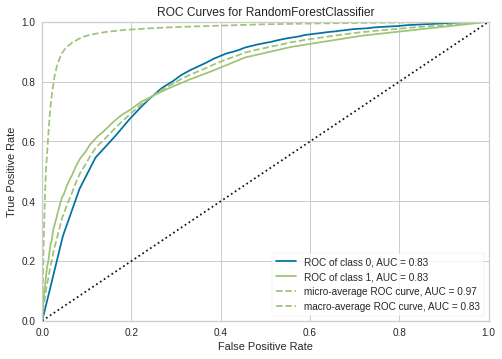

In [11]:
plot_model(model, plot='auc')

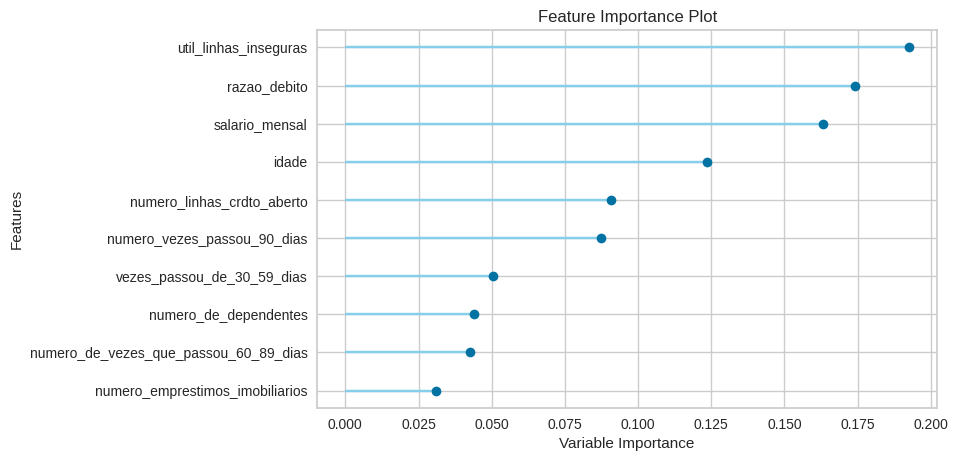

In [12]:
plot_model(model, plot='feature')

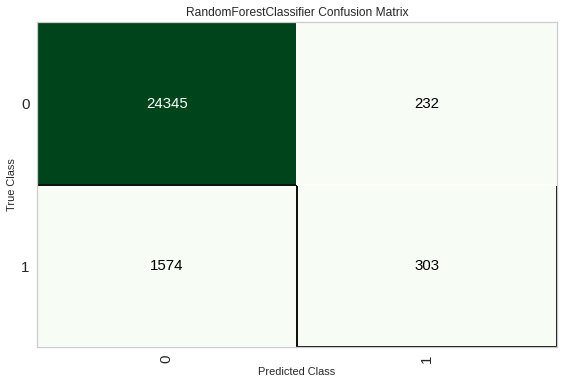

In [13]:
plot_model(model, plot='confusion_matrix')

In [14]:
predicts = predict_model(model, data=test)

In [15]:
predicts.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,Label,Score
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0,0,1.00
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0,0,0.96
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0,0,1.00
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0,0,0.91
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0,0,0.94


In [16]:
predicts['Label'].mean()

0.021425